# Call Me By My (Correct) Name: A Data-Driven Tale of Mispellings
## By <del>Katharyne</del> <del>Cathrynn</del> <del>Katherene</del> Kitty Garner



In [67]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["font.family"] = "sans-serif" 
import numpy as np
import pandas as pd
import csv
import bqplot
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
dobs = []
z = 1880
for i in range(139):
    if z <=2018:
        f = open('yob%s.txt' % z, 'r')
        text = f.readlines()
        f.close()
        for line in text:
            line = line.replace("\n", "")
            line = line+','+str(z)
            dobs.append(line)
        z = z+1       
column_names = ["Name", "Sex", 'Count', "Year"]
catstart = ["Caterin,", "Caterine,", "Catharine,", "Catheren,","Catherene,","Catherin,","Catherine,",
            "Catherne,","Catheryn,","Catheryne,","Cathirine,","Cathreen,","Cathren,","Cathrin,","Cathrine,",
            "Cathryn,","Cathryne,","Cathrynn,","Cathyrn,","Catrin,","Katerin,","Katerine,","Katerinne,",
            "Kateryn,","Katharin,","Katharine,","Katharyn,", "Katharyne,","Katheran,","Katheren,","Katherene,",
            "Katheriene,","Katherin,","Katherine,","Katherinne,","Katherne,","Katheryn,","Katheryne,",
            "Katherynn,","Kathran,","Kathrean,","Kathreen,","Kathren,","Kathrene,","Kathrin,","Kathrine,",
            "Kathryn,","Kathryne,","Kathrynn,","Kathrynne,","Kathyren,","Kathyrine,","Kathyrn,", "Kitty,"]
namespell = []
for name in catstart:
    for line in dobs:
        if str(name) in str(line):
            namespell.append(line)
catlist = []
for line in namespell:
    line = str(line)
    words = line.split(',')
    catlist.append(words)
catname = pd.DataFrame(catlist, columns = column_names)
catname["Year"]= pd.to_numeric(catname["Year"])
catname["Count"]= pd.to_numeric(catname["Count"])

When I was born my father named me Catherine, after the Queen Catherine the Great of Russia. It was a strong name, he felt, evocative of the power and strength he hopes I would grow to find, a name that rang timeless and pour and yet held within the potential for multiple nicknames, depending on how my personal vibe swung when I got older. It is a beautiful name that I am proud of, and absolutely no one spells it right.

That's fine. That's what my nickname is for-- literally, my nickname came about in high school when a friend was trying to spell my name correctly and after the third guess he was just like, "That's it, no more Catherine, your name is Kitty now." But it's still a trend I notice everyone time tell someone my name. I get K's instead of C's. I get spare A's and E's and I's wedged into spaces I didn't even know my name could hold. Some days I even get Y's loop-de-looping my Starbucks snickerdoodle hot chocolate. I remember so very clearly my experience as a bridesmaid at the wedding of one of my oldest and dearest friends, who had known me since freshman year of high school, who's new husband was the one who'd given me the nickname Kitty in the first place. At her bachelorette party she gaves all silver jewelry boxes, with our initials engraved in curlycue font. <i>K-E-G</i>.

"My name starts with a C through," I commented in confusion.

The bride-to-be met my look with one of blank confusion. "No it's not. It's Katherine, right? With a K."

A lifetime of this has made me wonder-- just how many ways <i>are</i> there to spell Catherine? And just how common are they? I rarely run into other Catherine's of any spelling-- just where are all these combinations coming from? In an effort to solve this question, and to find out the secrets of my own mispelled name, I consulted public goverment records and found a treasure trove of just the information I was looking for. The US Government Social Securty Administration keeps a [public record](https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data) of the names, birth years, and assigned sexes of all Social Security card applicants since 1880. The data is a 100% sample, with a few exceptions-- only names that appear five or more times are included for security reasons. Still, that in mind, this is an excellent place to look into spellings of my name in the US. I can even look at the prevelance of Kitty as well, because I know that was an actual name that people here used once upon a time.

So, based on this data. How many ways are there to spell Catherine?

As it turns out, 53.

In [89]:
@interact
def groupby(logscale = widgets.Checkbox(value = False)):
    catgroup = catname.groupby("Name")["Count"].sum().sort_values(ascending = False)
    ax = catgroup.plot(kind = "bar", figsize=(20,10), fontsize = 14, title = "Total Count of Each Spelling")
    if logscale == True:
        plt.yscale('log')
    ax.set_xlabel("Count")
    ax.set_ylabel("Name")

interactive(children=(Checkbox(value=False, description='logscale'), Output()), _dom_classes=('widget-interact…

But, as it turns out, only three of those spellings even make a dent in the data-- in fact, most of them need to be viewed on a logorithmic scale to even be seen compared to the three most common. You can use the little checkbox above the graph to swap between the log scale and the Apparently, my spelling beats out Katherine, which honestly surprised me. Given that swapping K to C is the most common mispelling, I would have throught it would be the other way around.

But, of course, raw counts are just the start. Let's take a look now at how popular Catherine as a name overall has been over time. 

In [96]:
@interact
def groupby(logscale = widgets.Checkbox(value = False)):
    fig, ax = plt.subplots(figsize=(20,10))
    lineplot = catname.groupby("Year")["Count"].sum()
    ax.plot(lineplot, label = "All Spellings")
    ax.set_title("Number of All Spellings of Catherine Since 1880", fontsize = 16)
    ax.set_xlabel("Year", fontsize = 14)
    ax.set_ylabel("Count", fontsize = 14)
    if logscale == True:
        plt.yscale('log')
    ax.legend(fontsize = 14)
    plt.show()

interactive(children=(Checkbox(value=False, description='logscale'), Output()), _dom_classes=('widget-interact…

I show this chart mainly to establish some context for other charts going forward-- because based on what we see here, the popularity of the name "Catherine" in all its spellings seems to fluxtuate massively over time, and doesn't seem to start getting popular at all until just before the 1920's. In order to draw valid conclusions regarding the popularity of each spelling, we'll need to talk about those assumptions.

First, the fact that Catherine doesn't seem to be a popular name until just before 1920. That may or may not really be the case; as stated, this data is from Social Security card applications. Social Security cards only came into existance in 1935, and obviously only people alive in 1935 could apply for them. There were likely a great many Catherines born between 1880 and 1935 who did not live to see their own social security cards, and thus were never counted. In fact, it might be argued that this first spike in name popularity may have actually been just records catching up to what was already happening

But what of the other spikes? First we need to determine if they are indeed spikes in popularity; after all, this is just a raw count of names. It could very well be that in places where the popularity of the name seems to spike, there's actually a spike in birth rates that makes all names more popular. In order to examine this assumption we must look at birthrate overall.

Below is a chart showing crude birth rate, or births per 1000 people, in the United States, from 1960 to 2018. This is not the full timeline reprisented by the name data, but it will encapsulate at least two of the apparent popularity spikes. This chart is from [The World Bank](https://data.worldbank.org/indicator/SP.DYN.CBRT.IN?locations=US) and includes open datasets like US Census data. 

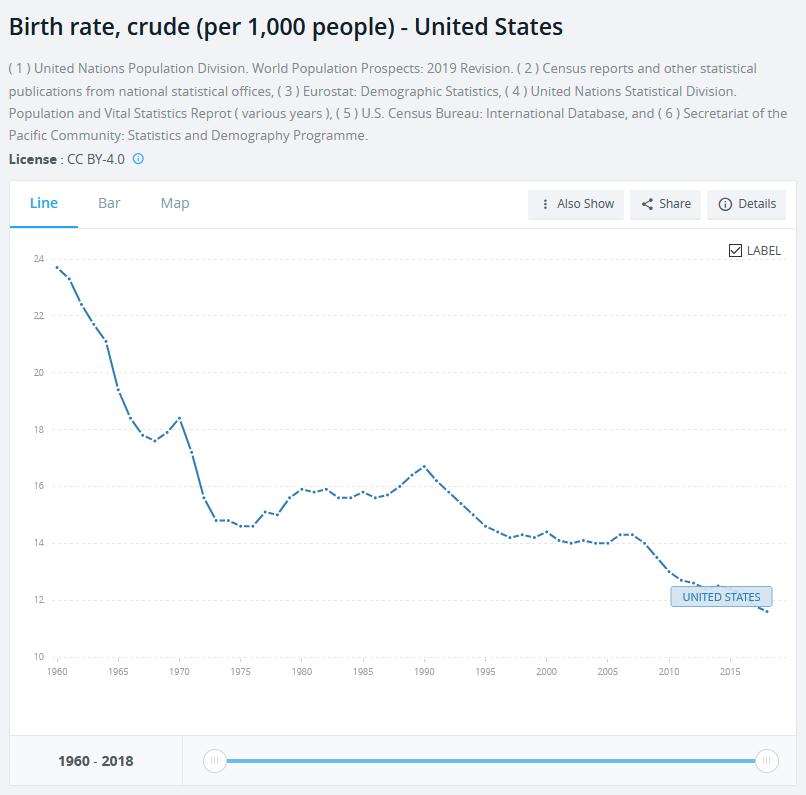

In [101]:
from IPython.core.display import Image, display
display(Image('birthrate.PNG', unconfined=True))

The number of Catherine's and their various spellings was similarly high in the 60's and the 90's, with a dip around the 70's. If this was a factor of population, then birthdates should have changed similarly. And indeed, there was a dip in birthrates around the 70's and a a little spike around the 90's, so we know at least part of that change is based on raw numbers. But, birth rate was significantly higher in 1960 than it was in 1990; this suggests that the spike in the number of Catherine's at this later date wasn't all population based. Here, at least, there was a very genuine spike in the popularity of Catherine varients.

So let's get into those variants. Below are the three most common names-- as determined by our bar graph-- and how they compare to one another over the years. For my own personal amusement, I've added in a line to show my own birth year of 1994, to see where my name stands among the rest. 

Not, of course, that you need to stop at the most popular three! Using the dropdown menus and the slider below, please feel free to change how many names you want to look at, and if you'd rather see the most popular or the least popular. The least popular names are actually so rare, they barely show up!

In [113]:
catgroup = catname.groupby("Name")["Count"].sum()
options = ["most", "least"]
@interact
def groupby(how_many = widgets.IntSlider(min = 1, max = 54, step = 1, value = 3),
            most_or_least_popular = list(options),
            logscale = widgets.Checkbox(value = False)):
    if most_or_least_popular == "most":
        catmax = catgroup.nlargest(how_many)
    elif most_or_least_popular == "least":
        catmax = catgroup.nsmallest(how_many)
    topnames = catmax.index
    fig, ax = plt.subplots(figsize=(20,10))
    for name in topnames:
        lineplot = catname.loc[catname["Name"] == name].groupby("Year")["Count"].sum()
        ax.plot(lineplot, label = name)
    ax.set_xlabel("Year", fontsize = 14)
    if most_or_least_popular == "most":
        ax.set_title("Top "+ str(how_many)+" Spelling Variations Over Time", fontsize = 16)
    if most_or_least_popular == "least":
        ax.set_title("Bottom "+ str(how_many)+" Spelling Variations Over Time", fontsize = 16)
    ax.set_ylabel("Count", fontsize = 14)
    plt.axvline(x = 1994, color='purple', linestyle='--', label = "My Birth Year")
    if logscale == True:
        plt.yscale('log')
    ax.legend(fontsize = 12)
    plt.show()

interactive(children=(IntSlider(value=3, description='how_many', max=54, min=1), Dropdown(description='most_or…

I was wondering before why my name was so frequently mispelled if it's the most common variation; this chart is the solution to that mystery. Catherine is only the most popular varation <i>historically</i>; in recent years, its been all but eclipsed by the other two pupular variables. In my birth year, my spelling was actually the least common of the three-- no wonder folks my age assume K's and Y's instead oc C's! The second most popular spelling overall, Katherine, got particularly popular at the start of the decade it seems. The next question would be: why?

That, I don't quite have an answer to yet, though I do have a guess: Katherine Hepburn. Katherine Hepburn was making movies long before the Katherine Spike of 1980-2000, but a properly famous actress like her stays relevant for quite some time. The 1980's would be just around the time when folks who had seen her movies as children in the late 50's and 60's, or had parents who liked her movies, would be starting to have kids. That, of course, is merely speculation.

But let's not let the three most popular names have all the fun-- below, I've included a tool to allow you to compare any two names to one another, no matter where they are in overall popularity. Feel free to experiment and see how other spelling trends change and grow over time! You'll be surprised to see how temporary some spellings are.

In [123]:
catclean = []
for name in catstart:
    name = name.replace(",", "")
    catclean.append(name)
scale_types = ["Normal", "Log"]
@interact
def over_time(first_name = list(catclean),
             second_name = list(catclean),
             logscale = widgets.Checkbox(value = False)):
    line1 = catname.loc[catname["Name"] == first_name].groupby("Year")["Count"].sum()
    line2 = catname.loc[catname["Name"] == second_name].groupby("Year")["Count"].sum()
    fig, ax = plt.subplots(figsize=(20,10))
    ax.plot(line1, label = first_name)
    if first_name != second_name:
        ax.plot(line2, label = second_name)
        ax.set_title("Comparison of Number of "+ first_name+"'s and Number of "+second_name+"'s' Born Over Time", fontsize = 16)
    else:
        ax.set_title("Number of "+ first_name+"'s Born Over Time", fontsize = 16)
    ax.set_xlabel("Year", fontsize = 14)
    ax.set_ylabel("Count", fontsize = 14)
    if logscale == True:
        plt.yscale('log')
    ax.legend(fontsize = 12)
    plt.show()

interactive(children=(Dropdown(description='first_name', options=('Caterin', 'Caterine', 'Catharine', 'Cathere…